In [1]:
import pickle
import cvxpy as cp
import numpy as np

with open("./swdmdc.pickle", "rb") as fp:
    args = pickle.load(fp)

In [2]:
X, Xp, U, r, Js, W = args['X'], args['Xp'], args['U'], args['r'], args['Js'], args['W']

In [3]:
n_snap, n_obs = X.shape
_, n_states = Js[0].shape

In [4]:


# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.78871195e-19  2.85112420e-02  2.78911361e-19  3.35215860e-20
 -2.74242174e-19  1.49285011e-01 -1.01178850e-19  8.44481581e-20
  2.46718649e-01  5.78224144e-01 -4.04653359e-19  1.01242860e-03
 -9.41029429e-20  2.26767464e-01 -1.58907644e-19 -8.81720085e-20
 -1.22981679e-19 -1.52096895e-19  1.12573994e-19 -3.46400345e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


In [20]:
n_obs = 50
K = cp.Variable((n_obs, n_obs))
objective = cp.Minimize(sum([ cp.sum_squares((1.0 / n_snap) * (xpi[:n_obs] - K @ xi[:n_obs])) for xpi, xi in zip(X, Xp)]))
constraints = None
prob = cp.Problem(objective, constraints)

In [37]:
n_obs = 50

# so the objective isn't numerically unstable
sf = (1.0 / n_snap)

# koopman operator
K = cp.Variable((n_obs, n_obs))

# SW-eDMD objective
objective = cp.Minimize(sum([ 
    cp.sum_squares(sf * cp.multiply((np.abs(J) @ w)[:n_obs], (xpi[:n_obs] - K @ xi[:n_obs]))) for J, w, xpi, xi in zip(Js, W, X, Xp)
]))

# unconstrained problem
constraints = None

# SW-eDMD problem
prob = cp.Problem(objective, constraints)

In [38]:
# solve for the SW-eDMD Koopman operator
result = prob.solve()

In [39]:
import matplotlib.pyplot as plt

K.value

array([[ 1.01420833e+00,  1.83256034e-01,  6.01953858e-06, ...,
         9.86498696e-07, -3.25486198e-06, -4.20283732e-06],
       [-1.23471337e-01,  1.03266704e+00, -5.53954240e-08, ...,
        -9.95512473e-08,  1.29915669e-07,  9.19827444e+00],
       [-1.68219857e-04, -1.51541359e-04,  4.48879107e-05, ...,
         6.02630564e-05,  7.75524207e-05,  1.12908744e-04],
       ...,
       [-1.24383893e-04, -1.25237310e-04,  2.80704679e-05, ...,
         3.78264688e-05,  4.86066262e-05,  7.08190572e-05],
       [-9.86490326e-05, -9.69166592e-05,  2.17091987e-05, ...,
         2.92561073e-05,  3.75964602e-05,  5.47768438e-05],
       [-2.21678819e-06, -2.43162559e-06,  6.19694439e-07, ...,
         8.33327232e-07,  1.07123271e-06,  1.56028616e-06]])

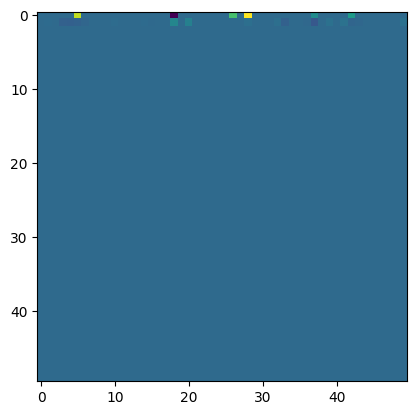

In [40]:
plt.imshow(K.value)